In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid', palette='husl')
import time 
from datetime import datetime

In [2]:
consumerKey = 'hnuzMJ1QGE3TcjlYiXohfA6vkGb55OT9xKtTCcd31L4'

In [3]:
url_summary = 'https://api-tokyochallenge.odpt.org/api/v4/files/Agoop/data/Summary.csv?acl:consumerKey={}'
df_summary = pd.read_csv(url_summary.format(consumerKey))

In [4]:
df_summary

,date,dayofweek,dailyid_count,log_count
0,2018/10/01,MON,37382,2164347
1,2018/10/02,TUE,38807,2235014
2,2018/10/03,WED,38934,2260240
3,2018/10/04,THU,38730,2253780
4,2018/10/05,FRI,39288,2414898
...,...,...,...,...
360,2019/09/26,THU,56539,3283266
361,2019/09/27,FRI,56803,3360115
362,2019/09/28,SAT,48571,2918971
363,2019/09/29,SUN,44924,2621201


## Information About the Dataset
**Source**: [Tokyo Public Transportation Open Data Challenge](https://tokyochallenge.odpt.org). The data is provided by Agoop, a subsidiary of SoftBank which is a major cell phone data provider in Japan.

**Dataset**: [Floating Populattion Data (Point type) of AGOOP Corp.](https://ckan-tokyochallenge.odpt.org/dataset/o_fpd_point-agoop)

<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td>dailyid</td>
    <td>Unique ID for each user. Renewed at 0 a.m. everyday</td>
  </tr>
  <tr>
    <td>year</td>
    <td>year</td>
  </tr>
  <tr>
    <td>month</td>
    <td>month</td>
  </tr>
  <tr>
    <td>day</td>
    <td>day</td>
  </tr>
  <tr>
    <td>dayofweek</td>
    <td>1: Mon, 2: Tue, 3: Wed, 4: Thur, 5: Fri, 6: Sat, 7: Sun</td>
  </tr>
  <tr>
    <td>hour</td>
    <td>hour</td>
  </tr>
  <tr>
    <td>minute</td>
    <td>minute</td>
  </tr>
  <tr>
    <td>latitude</td>
    <td>latitude</td>
  </tr>
  <tr>
    <td>longitude</td>
    <td>longitude</td>
  </tr>
  <tr>
    <td>OS</td>
    <td>Andriod / iOS</td>
  </tr>
  <tr>
    <td><b>home_countryname</b></td>
    <td>Country of origin estimated from location data</td>
  </tr>
  <tr>
    <td>plmn</td>
    <td>Information about the phone carrier of the SIM card</td>
  </tr>
  <tr>
    <td>plmn_countryname</td>
    <td>Carrier country</td>
  </tr>
  <tr>
    <td><b>setting_currency</b></td>
    <td>currency settings</td>
  </tr>
  <tr>
    <td>setting_language</td>
    <td>language settings</td>
  </tr>
  <tr>
    <td>setting_country</td>
    <td>country settings</td>
  </tr>
  <tr>
    <td>logtype_category</td>
    <td>foreground, background, other</td>
  </tr>
  <tr>
    <td>logtype_subcategory</td>
    <td>move(iOS), arrival(iOS), departure(iOS), timer(Android only)</td>
  </tr>
  <tr>
    <td>accuracy</td>
    <td>GPS accuracy</td>
  </tr>
  <tr>
    <td>speed</td>
    <td>speed in m/sec obtained from phone sensor or Agoop's original algorithm</td>
  </tr>
  <tr>
    <td>estimated_speed_flag</td>
    <td>Whether speed info was obtained using sensor or Agoop's algorithm</td>
  </tr>
  <tr>
    <td>course</td>
    <td>Move direction. 0 degrees North</td>
  </tr>
  <tr>
    <td>estimated_course_flag</td>
    <td>Whether estimated course was obtained using sensor or Agoop's algorithm</td>
  </tr>
  <tr>
    <td>prefcode</td>
    <td>Code indicating which prefecture the log was obtained from</td>
  </tr>
  <tr>
    <td><b>citycode</b></td>
    <td>Code indicating</td>
  </tr>
  <tr>
    <td>mesh100mid</td>
    <td>ID for mesh data(also availble)</td>
  </tr>
  <tr>
    <td>home_prefcode</td>
    <td>Estimated home location type using AGOOP's original algorithm</td>
  </tr>
  <tr>
    <td><b>home_citycode</b></td>
    <td>Estimated home location type using AGOOP's original algorithm</td>
  </tr>
  <tr>
    <td>workplace_prefcode</td>
    <td>Estimated workplace location type using AGOOP's original algorithm</td>
  </tr>
  <tr>
    <td>workplace_citycode</td>
    <td>Estimated workplace location type using AGOOP's original algorithm</td>
  </tr>
  <tr>
    <td><b>transportation_type</b></td>
    <td>Estimated transportation type using AGOOP's original algorithm</td>
  </tr>
  <tr>
    <td><b>gender</b></td>
    <td>gender of the user</td>
  </tr>
    
</table>

</body>
</html>

**Possible Use of Data**: Tourism, COVID-19

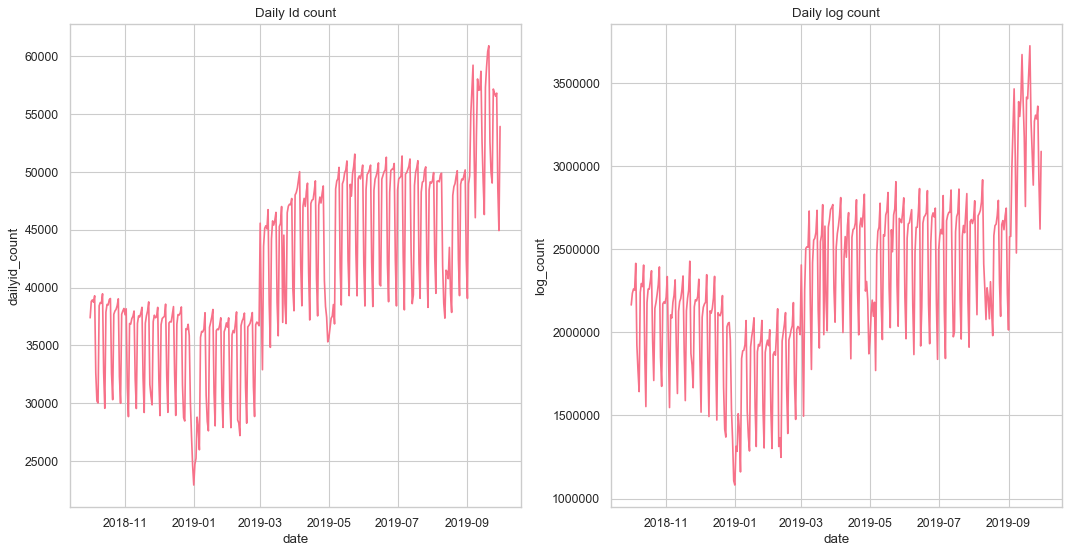

In [5]:
df_summary.date = [datetime.strptime(_d, '%Y/%m/%d') for _d in df_summary.date]
plt.figure(figsize=(16,8), dpi=80)
plt.subplot(121)
sns.lineplot(x='date', y='dailyid_count', 
             data=df_summary,
             estimator=None
            )
plt.title('Daily Id count')
plt.subplot(122)
sns.lineplot(x='date', y='log_count', 
             data=df_summary,
             estimator=None
            )
plt.title('Daily log count')
plt.show()

In [6]:
citymaster_url = "https://api-tokyochallenge.odpt.org/api/v4/files/Agoop/data/prefcode_citycode_master_UTF-8.csv?acl:consumerKey={}"
df_citycode = pd.read_csv(citymaster_url.format(consumerKey))

tokyo_32_dict = dict(df_citycode[df_citycode.prefname=='東京都'].loc[:,['cityname', 'citycode']].values[:32])

In [7]:
tokyo_32_dict

{'千代田区': 13101,
 '中央区': 13102,
 '港区': 13103,
 '新宿区': 13104,
 '文京区': 13105,
 '台東区': 13106,
 '墨田区': 13107,
 '江東区': 13108,
 '品川区': 13109,
 '目黒区': 13110,
 '大田区': 13111,
 '世田谷区': 13112,
 '渋谷区': 13113,
 '中野区': 13114,
 '杉並区': 13115,
 '豊島区': 13116,
 '北区': 13117,
 '荒川区': 13118,
 '板橋区': 13119,
 '練馬区': 13120,
 '足立区': 13121,
 '葛飾区': 13122,
 '江戸川区': 13123,
 '八王子市': 13201,
 '立川市': 13202,
 '武蔵野市': 13203,
 '三鷹市': 13204,
 '青梅市': 13205,
 '府中市': 13206,
 '昭島市': 13207,
 '調布市': 13208,
 '町田市': 13209}

## Initial Analysis
The entire dataset was too large to store in memory, so I reduced it. (Refer to get_data.py for scraping code). It took a few hours to reduce for a little more than a month's worth of data.

**Range**: `2019/06/01 10:00` to `2019/07/07 23:00`

**Location**: 
* `23 Districts`: Chiyoda, Chuo, Minato, Shinjuku, Bunkyo, Daito, Sumida, Koutou, Shinagawa, Meguro, Oota, Setagaya, Shibuya, Nakano, Suginami, Toshima, Kita, Arakawa, Itabashi, Nerima, Adachi, Katsushika, Edogawa
* `9 Cities`: Hachioji, Tachikawa, Musashino, Mitaka, Ome, Fuchu, Akishima, Chofu, Machida

**Value**: Number of `unique ID counts for each area per hour`.

**Size**: Long Format: `16476x3`, Wide Format: `32x518`

In [8]:
city_eng = ['Chiyoda', 'Chuo', 'Minato', 'Shinjuku', 'Bunkyo', 'Daito', 'Sumida', 'Koutou', 'Shinagawa', 'Meguro', 
            'Oota', 'Setagaya', 'Shibuya', 'Nakano', 'Suginami', 'Toshima', 'Kita', 'Arakawa', 'Itabashi', 'Nerima', 'Adachi', 
            'Katsushika', 'Edogawa', 'Hachioji', 'Tachikawa', 'Musashino', 'Mitaka', 'Ome', 'Fuchu', 'Akishima', 'Chofu', 'Machida']
tokyo_32_eng = {code: name for code, name in zip(tokyo_32_dict.values(), city_eng)}

In [9]:
float_pop = (pd.read_csv('../data/floating_population.csv')
             .iloc[:,1:]
             .assign(cityname = lambda dataframe: dataframe.citycode.map(tokyo_32_eng))
             .assign(datetime = lambda dataframe: pd.to_datetime(dataframe.datetime))
            )

In [10]:
float_pop.head()

,citycode,dailyid,datetime,cityname
0,13101.0,1039,2019-06-01 10:00:00,Chiyoda
1,13102.0,711,2019-06-01 10:00:00,Chuo
2,13103.0,1031,2019-06-01 10:00:00,Minato
3,13104.0,920,2019-06-01 10:00:00,Shinjuku
4,13105.0,365,2019-06-01 10:00:00,Bunkyo


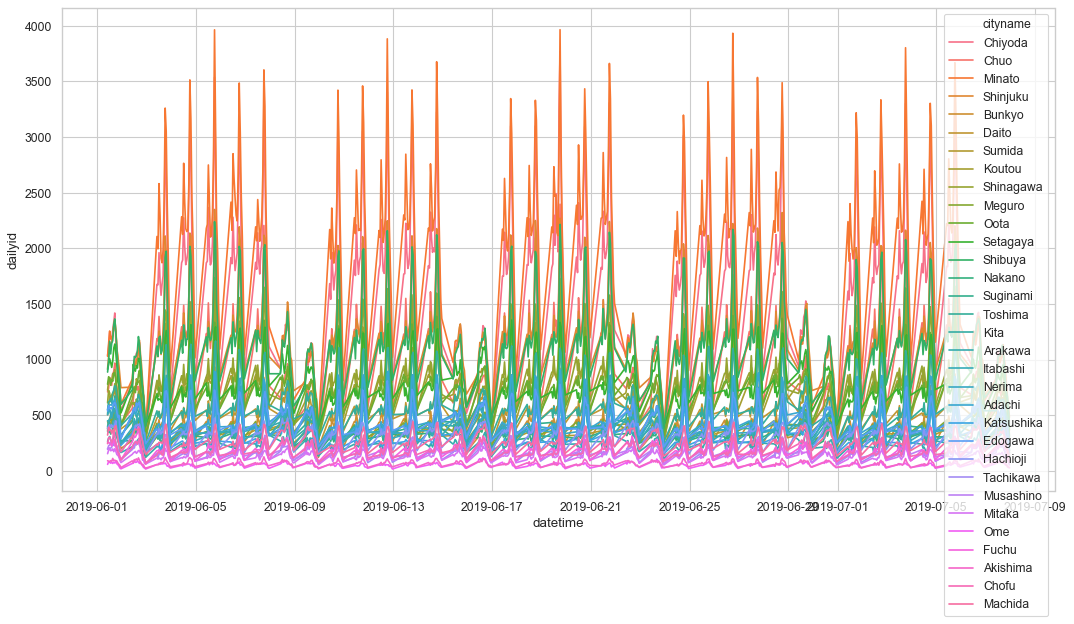

In [11]:
fig = plt.figure(figsize=(16,8), dpi=80)
ax = fig.add_subplot(111)
ax = sns.lineplot('datetime', 'dailyid', hue='cityname', data=float_pop)
plt.show()

### Analysis for One District (Chiyoda ward)

**Background Info**
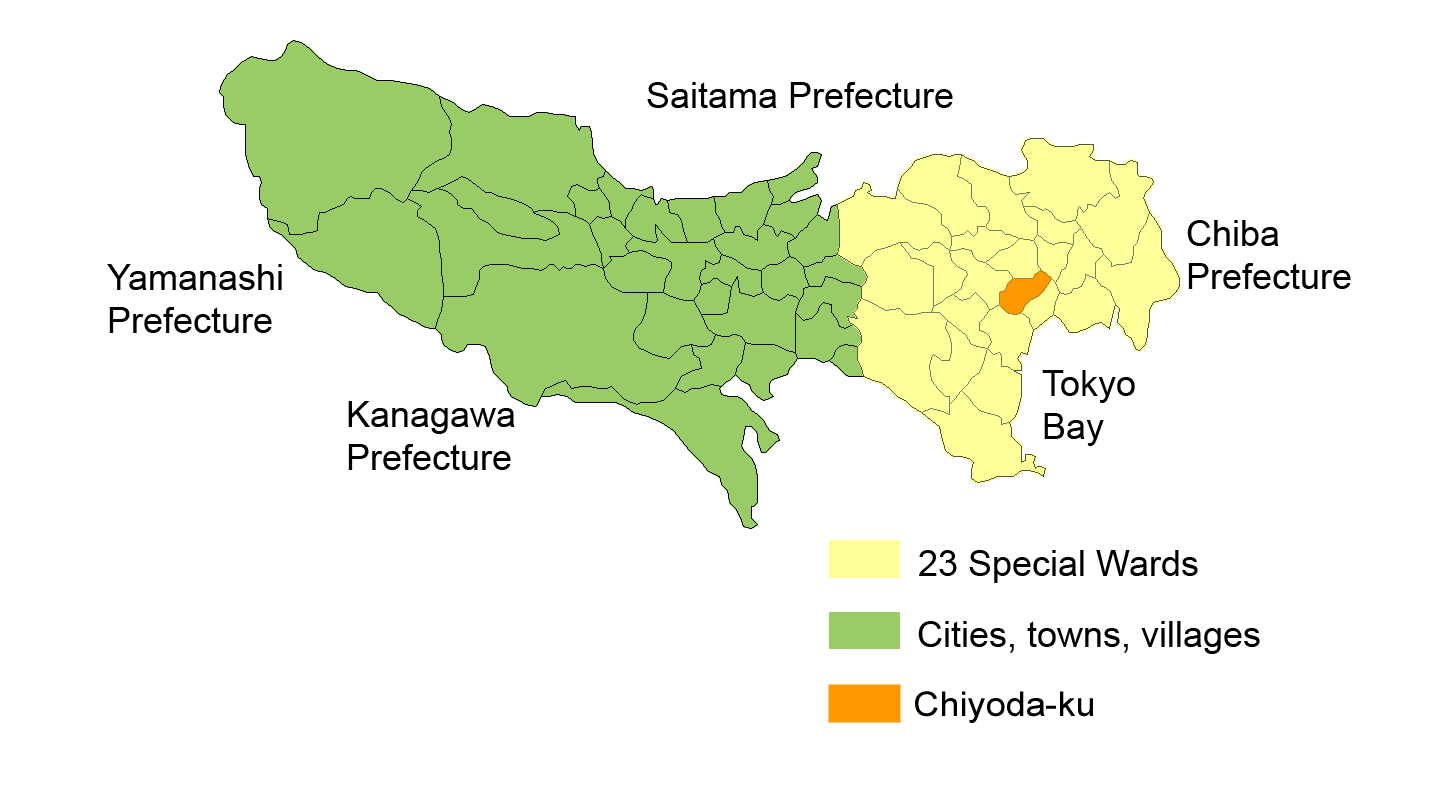
* "Political Center" of Japan. The Imperial Palace, National Diet(Like the congress building in Washington DC), Minister's Official Residence, Supreme Court, ministries, and agencies are located within Chiyoda Ward.


* The least populated among the 23 special wards. It is a "workplace" where people commute to but do not live, just like the financial district in San Francisco.

In [12]:
chiyoda = (float_pop
         .set_index('citycode')
         .loc[13101.0,:]
)

In [13]:
chiyoda

,dailyid,datetime,cityname
citycode,,,
13101.0,1039,2019-06-01 10:00:00,Chiyoda
13101.0,1113,2019-06-01 11:00:00,Chiyoda
13101.0,1245,2019-06-01 12:00:00,Chiyoda
13101.0,1183,2019-06-01 13:00:00,Chiyoda
13101.0,1178,2019-06-01 14:00:00,Chiyoda
...,...,...,...
13101.0,867,2019-07-07 19:00:00,Chiyoda
13101.0,730,2019-07-07 20:00:00,Chiyoda
13101.0,579,2019-07-07 21:00:00,Chiyoda


### Weekly Trends

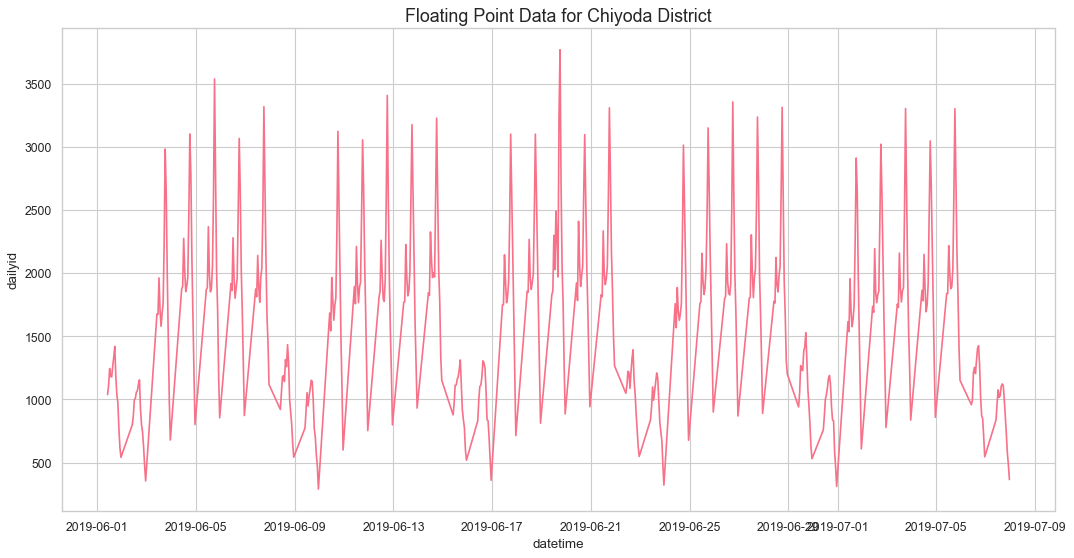

In [14]:
fig = plt.figure(figsize=(16,8), dpi=80)
ax = fig.add_subplot(111)
ax = sns.lineplot('datetime', 'dailyid', data=chiyoda)
ax.set_title('Floating Point Data for Chiyoda District', size=16)
plt.show()

**Observations**: We can clearly see a weekly cycle. The higher peaks correspond to weekdays and the lower peaks correpond to weekends.

In [15]:
mask = (chiyoda['datetime'] > '2019-06-10') & (chiyoda['datetime'] < '2019-06-17')
chiyoda_subset = chiyoda.loc[mask]

### Daily Trends

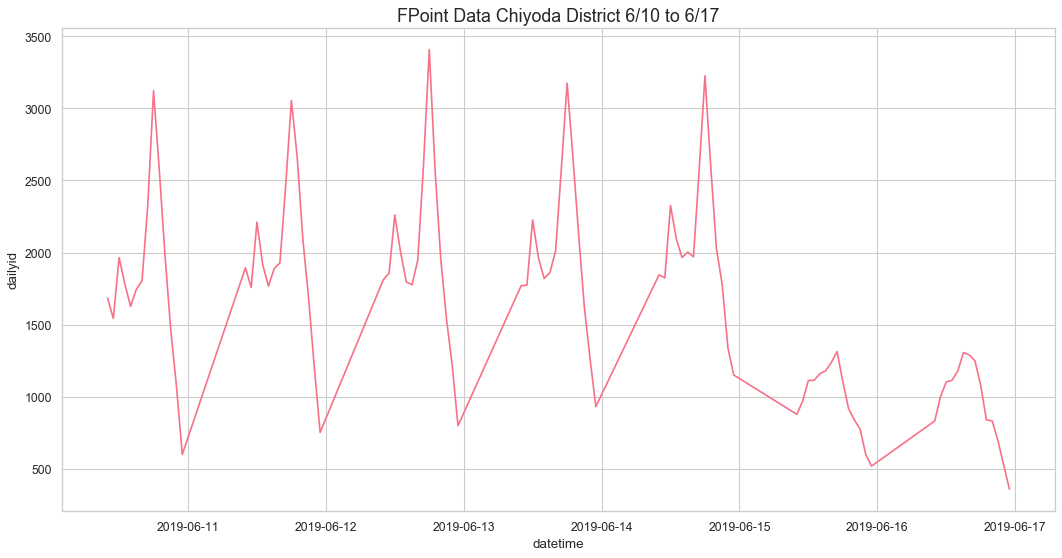

In [16]:
fig = plt.figure(figsize=(16,8), dpi=80)
ax = fig.add_subplot(111)
ax = sns.lineplot('datetime', 'dailyid', data=chiyoda_subset)
ax.set_title('FPoint Data Chiyoda District 6/10 to 6/17', size=16)
plt.show()

**Observation**: There are two peaks each day: one small, one large. Why? 

## Problems

1. There are gaps in the data. There is only data from `10:00` to `23:59` everyday. There is no data from `0:00` to `9:59`. How to deal with this gap? Also, this means we don't have the data for the rush hours.


2. Currently the 2D autocorrelation transform function isn't compatible with `32x512`. Need to rewrite it so that it can be used for non-squared matrices.


3. Too simple? Maybe we can pull more variables from the original dataset?

## Imputation
* Create a another DataFrame and use left join with the one with have to produce NA values on purpose. 
* Use an inputation method to try and impute the data.
* Consider using R to impute time series?

In [17]:
date_range = pd.date_range('2019-06-01-10', '2019-07-07-23', freq = 'H')
dummy = pd.DataFrame({'datetime': date_range, 
              'dummy': np.zeros(len(date_range))})
df = pd.merge(dummy, chiyoda, 'left', on='datetime')

In [18]:
df = (df
      .assign(InterpolateAkima=df.dailyid.interpolate(method='akima'))
      .assign(InterpolateCubic=df.dailyid.interpolate(method='cubic'))
      .melt(id_vars = 'datetime',
            value_vars = ['dailyid', 'InterpolateAkima', 'InterpolateCubic'],
            var_name = 'type'
           )
     )

In [19]:
df

,datetime,type,value
0,2019-06-01 10:00:00,dailyid,1039.0
1,2019-06-01 11:00:00,dailyid,1113.0
2,2019-06-01 12:00:00,dailyid,1245.0
3,2019-06-01 13:00:00,dailyid,1183.0
4,2019-06-01 14:00:00,dailyid,1178.0
...,...,...,...
2629,2019-07-07 19:00:00,InterpolateCubic,867.0
2630,2019-07-07 20:00:00,InterpolateCubic,730.0
2631,2019-07-07 21:00:00,InterpolateCubic,579.0
2632,2019-07-07 22:00:00,InterpolateCubic,483.0


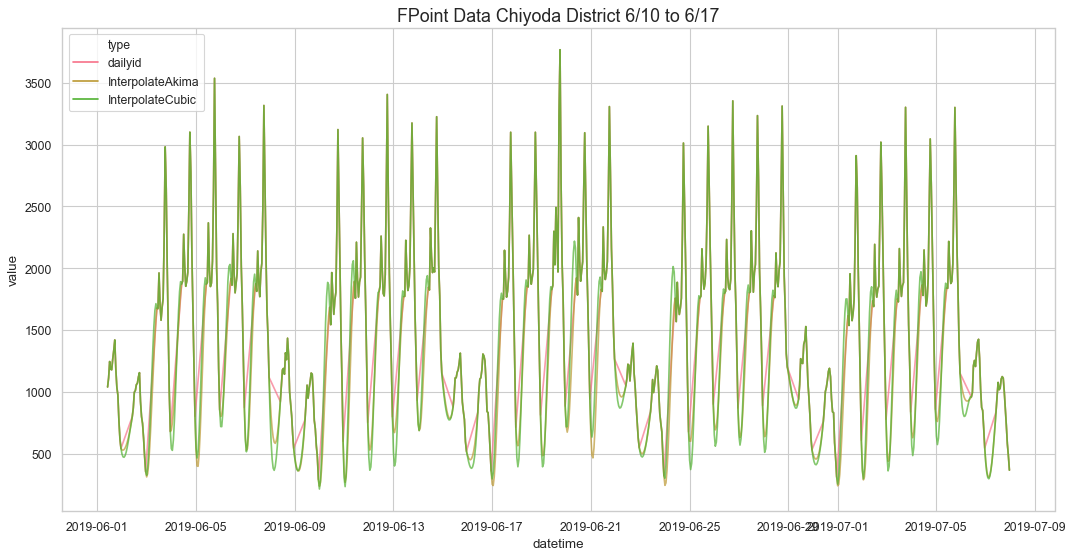

In [20]:
fig = plt.figure(figsize=(16,8), dpi=80)
ax = fig.add_subplot(111)
ax = sns.lineplot('datetime', 'value', hue='type', legend='full', alpha=0.7, data=df)
ax.set_title('FPoint Data Chiyoda District 6/10 to 6/17', size=16)
plt.show()

In [21]:
mask = (df['datetime'] > '2019-06-10') & (df['datetime'] < '2019-06-17')
df_subset = df.loc[mask]

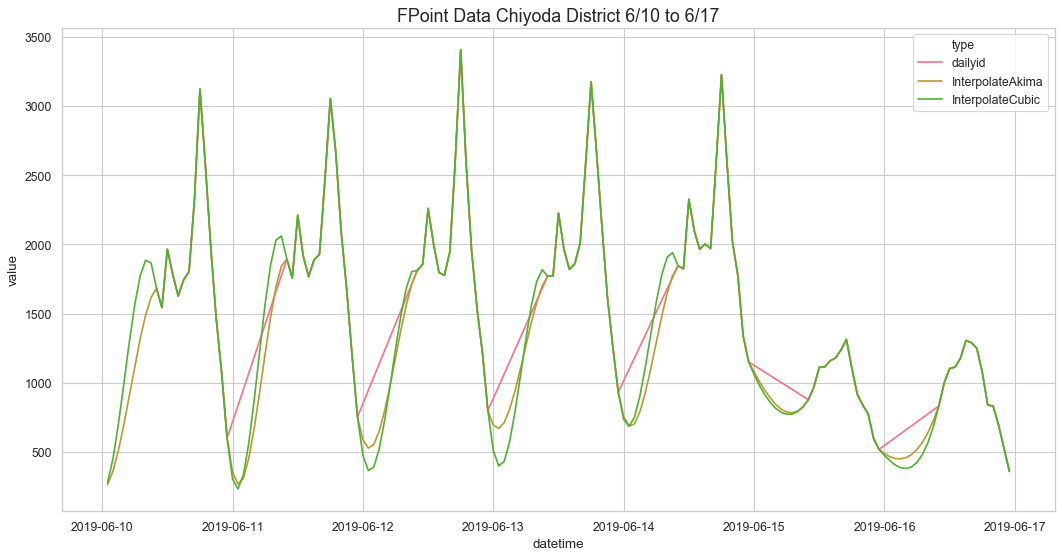

In [22]:
fig = plt.figure(figsize=(16,8), dpi=80)
ax = fig.add_subplot(111)
ax = sns.lineplot('datetime', 'value', hue='type', data=df_subset)
ax.set_title('FPoint Data Chiyoda District 6/10 to 6/17', size=16)
plt.show()

**Remarks**: I don't know how to evaluate the imputation algorithms. This is a topic for more research. For the time being, I will apply this for all data.

### Imputing for all cities

In [23]:
date_range = pd.date_range('2019-06-01-10', '2019-07-07-23', freq = 'H')
dummy = pd.DataFrame({'datetime': date_range, 
              'dummy': np.zeros(len(date_range))})

temp = []
for code in float_pop.citycode.unique():
    city_subset = (float_pop
               .set_index('citycode')
               .loc[code,:]
              )
    city_subset = pd.merge(dummy, city_subset, 'left', on='datetime')
    imputed = (city_subset.assign(InterpolateAkima=city_subset.dailyid.interpolate(method='akima'))
               .assign(citycode=code)
               .drop(['dummy', 'dailyid'], axis=1)
              )
    temp.append(imputed)
    
float_pop_imputed = pd.concat(temp).sort_values(['datetime', 'citycode'])
float_pop_imputed.to_csv('../data/float_pop_akima.csv')

## Hierarchical Clustering

Distance metric: `Pearson Correlation`. We have multiple timeseries with the same length, therefore we do not need to rely on elastic methods such as Dynamic Time Warping. Correlation is better than euclidean distance, because it takes structural similarity in to account.

Clustering method: `Hierarchical Agglomerative Clustering` with `average` linkage.

### Obtain Distance Matix

In [24]:
float_pop_imputed_wide = float_pop_imputed.pivot_table(index='datetime', columns='cityname', values='InterpolateAkima')
float_pop_imputed_wide.columns

Index(['Adachi', 'Akishima', 'Arakawa', 'Bunkyo', 'Chiyoda', 'Chofu', 'Chuo',
       'Daito', 'Edogawa', 'Fuchu', 'Hachioji', 'Itabashi', 'Katsushika',
       'Kita', 'Koutou', 'Machida', 'Meguro', 'Minato', 'Mitaka', 'Musashino',
       'Nakano', 'Nerima', 'Ome', 'Oota', 'Setagaya', 'Shibuya', 'Shinagawa',
       'Shinjuku', 'Suginami', 'Sumida', 'Tachikawa', 'Toshima'],
      dtype='object', name='cityname')

In [25]:
dis = 1 - float_pop_imputed_wide.corr()
dis 

cityname,Adachi,Akishima,Arakawa,Bunkyo,Chiyoda,Chofu,Chuo,Daito,Edogawa,Fuchu,...,Ome,Oota,Setagaya,Shibuya,Shinagawa,Shinjuku,Suginami,Sumida,Tachikawa,Toshima
cityname,,,,,,,,,,,,,,,,,,,,,
Adachi,0.000000,0.238099,0.072820,0.223535,0.408535,0.173138,0.405282,0.067212,0.049944,0.338007,...,0.559298,0.094993,0.034462,0.151133,0.233202,0.170508,0.034638,0.036451,0.196497,0.039966
Akishima,0.238099,0.000000,0.407674,0.279059,0.435117,0.194789,0.432783,0.294192,0.245410,0.129604,...,0.281259,0.230847,0.239044,0.286275,0.382157,0.304950,0.260508,0.262470,0.084767,0.250563
Arakawa,0.072820,0.407674,0.000000,0.212609,0.344340,0.360311,0.340990,0.045125,0.133148,0.538829,...,0.825992,0.117065,0.109265,0.143913,0.163790,0.151395,0.103582,0.058806,0.381360,0.065200
Bunkyo,0.223535,0.279059,0.212609,0.000000,0.065158,0.427297,0.066662,0.111497,0.328208,0.329742,...,0.618812,0.073453,0.278053,0.046458,0.045140,0.038708,0.282142,0.175793,0.289828,0.153952
Chiyoda,0.408535,0.435117,0.344340,0.065158,0.000000,0.648842,0.006057,0.226815,0.547097,0.463811,...,0.750255,0.174440,0.485105,0.104019,0.053414,0.085679,0.483079,0.338536,0.462880,0.312917
Chofu,0.173138,0.194789,0.360311,0.427297,0.648842,0.000000,0.643067,0.301474,0.149619,0.217610,...,0.354571,0.280148,0.134949,0.358732,0.509699,0.390202,0.147128,0.221500,0.143113,0.214792
Chuo,0.405282,0.432783,0.340990,0.066662,0.006057,0.643067,0.000000,0.222030,0.539683,0.463996,...,0.750617,0.171158,0.477141,0.099556,0.050847,0.083487,0.476129,0.330305,0.459475,0.307773
Daito,0.067212,0.294192,0.045125,0.111497,0.226815,0.301474,0.222030,0.000000,0.132014,0.400972,...,0.676721,0.050122,0.099832,0.054579,0.093420,0.066370,0.100477,0.035585,0.262654,0.036770
Edogawa,0.049944,0.245410,0.133148,0.328208,0.547097,0.149619,0.539683,0.132014,0.000000,0.346663,...,0.540813,0.163550,0.033934,0.247429,0.346937,0.274849,0.045068,0.072060,0.198874,0.089485


/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:595: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


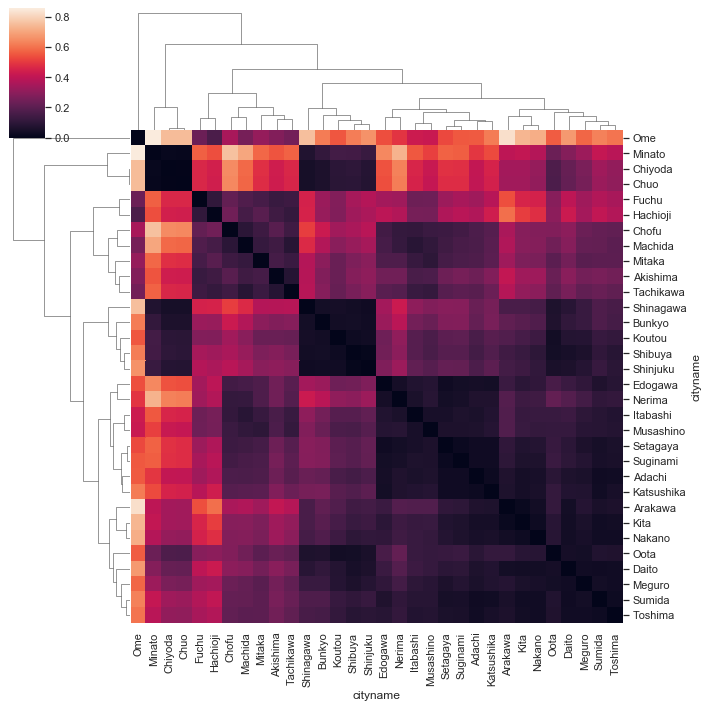

In [26]:
clustergrid = sns.clustermap(dis)

**Remarks**: From the heatmap there appears to three distinguishable cluster for our data. 

In [27]:
from scipy.cluster import hierarchy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


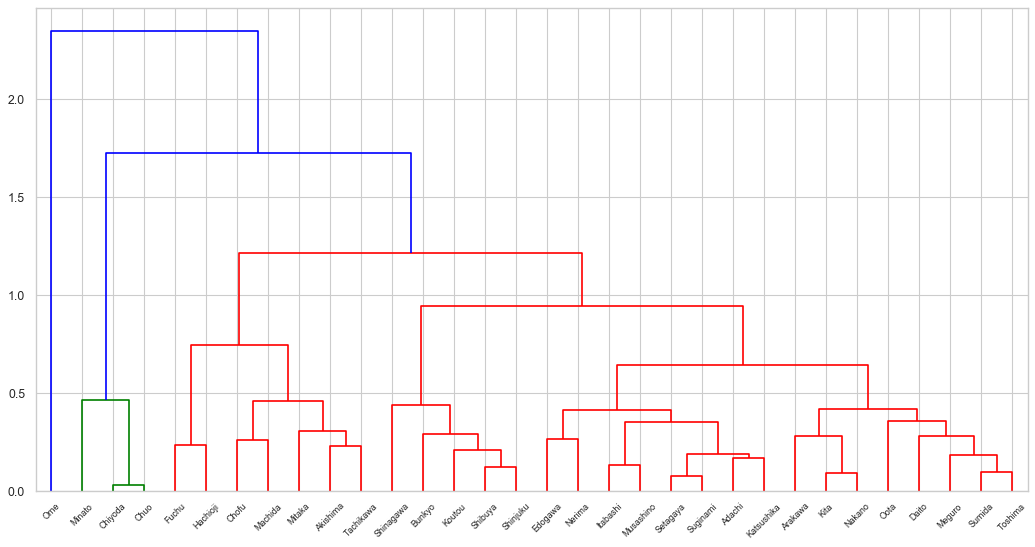

In [28]:
Z = hierarchy.linkage(dis, 'average')
fig = plt.figure(figsize=(16,8), dpi=80)
dn = hierarchy.dendrogram(Z, labels=dis.index)

In [29]:
n_clusters = 5
cuttree = hierarchy.cut_tree(Z, n_clusters=n_clusters)
clusters = {i: dis.index[np.ravel(cuttree) == i] for i in range(n_clusters)}
clusters

{0: Index(['Adachi', 'Arakawa', 'Daito', 'Edogawa', 'Itabashi', 'Katsushika',
        'Kita', 'Meguro', 'Musashino', 'Nakano', 'Nerima', 'Oota', 'Setagaya',
        'Suginami', 'Sumida', 'Toshima'],
       dtype='object', name='cityname'),
 1: Index(['Akishima', 'Chofu', 'Fuchu', 'Hachioji', 'Machida', 'Mitaka',
        'Tachikawa'],
       dtype='object', name='cityname'),
 2: Index(['Bunkyo', 'Koutou', 'Shibuya', 'Shinagawa', 'Shinjuku'], dtype='object', name='cityname'),
 3: Index(['Chiyoda', 'Chuo', 'Minato'], dtype='object', name='cityname'),
 4: Index(['Ome'], dtype='object', name='cityname')}

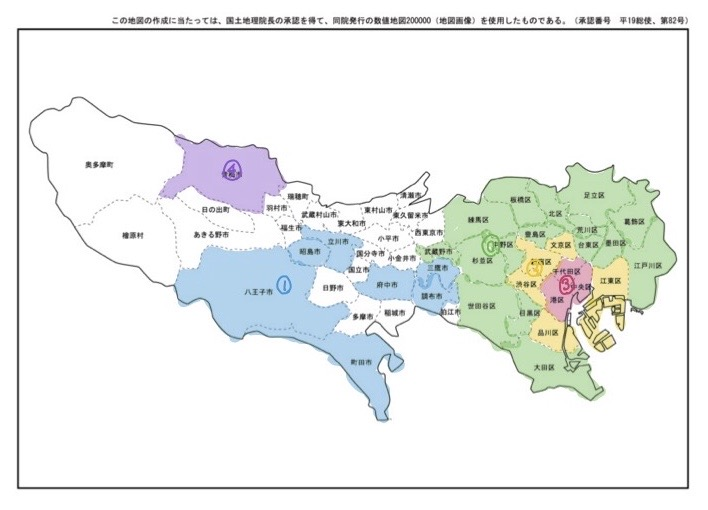

* Order the data according to the distance from the center of tokyo.

In [32]:
cluster_index = [3, 2, 0 , 1, 4]
float_pop_sorted = pd.concat([(float_pop_imputed
                               .set_index('cityname')
                               .loc[clusters[idx],:]
                               .pivot_table(index='cityname', columns='datetime', values='InterpolateAkima')
                              ) for idx in cluster_index])
float_pop_sorted.to_csv('../data/float_pop_sorted.csv')